# **HW1: Regression** 
In *assignment 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict the number of dengue cases


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict the number of dengue cases in a different way than the basic part

# 1. Basic Part (60%)
In the first part, you need to implement the regression to predict the number of dengue cases

Please save the prediction result in a csv file **hw1_basic.csv**


## Import Packages

> Note: You **cannot** import any other package in the basic part

In [692]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

## Global attributes
Define the global attributes

In [693]:
input_dataroot = 'hw1_basic_input.csv' # Input file named as 'hw1_basic_input.csv'
output_dataroot = 'hw1_basic.csv' # Output file will be named as 'hw1_basic.csv'

input_datalist =  [] # Initial datalist, saved as numpy array
output_datalist =  [] # Your prediction, should be 10 * 4 matrix and saved as numpy array
             # The format of each row should be ['epiweek', 'CityA', 'CityB', 'CityC']

You can add your own global attributes here


In [694]:
shuffle_value = 0.8
w0 = 0
w1 = 0

## Load the Input File
First, load the basic input file **hw1_basic_input.csv**

Input data would be stored in *input_datalist*

In [695]:
# Read input csv to datalist
with open(input_dataroot, newline='') as csvfile:
  input_datalist = np.array(list(csv.reader(csvfile)))


## Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions


### Step 1: Split Data
Split data in *input_datalist* into training dataset and validation dataset 



In [696]:

def SplitData(tmp, country_index):
  shuffled_data = np.delete(tmp, 0, 0)
  np.random.shuffle(shuffled_data)
  rows, columns = shuffled_data.shape
  x, y = np.array(shuffled_data.T[country_index]), np.array(shuffled_data.T[country_index+3])

  str_data = np.vstack((x, y)).T
  new_data = np.asarray(str_data, dtype=float)

  training_data, vaildation_data = np.array(new_data[:int(rows*shuffle_value)]), np.array(new_data[int(rows*shuffle_value):])


  return [training_data, vaildation_data]
  #print(x_test.shape, x_vaild.shape, y_test.shape, y_vaild.shape)

### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [697]:
def PreprocessData(country_index):
    data = []
    tmp = input_datalist
    for col in range(len(input_datalist)-1, -1, -1):
        if input_datalist[col, 1] == '' or input_datalist[col, 4] == '0':
            tmp = np.delete(tmp, col, 0) #將''刪除及0刪除
    #print(tmp)
    for col in range(1, len(tmp)):
        #print(col)
        if float(tmp[col, country_index]) < 0:
            continue
        data.append(math.log10(float(tmp[col, country_index+3])/float(tmp[col, country_index])))
        #print(data)

    data_mean, data_std = np.mean(data), np.std(data)
    lower, upper = data_mean - data_std*1.2, data_mean + data_std*1.2

    tmp_iter = tmp
    for index in range(len(data)-1, -1, -1):
        if data[index] >= upper or data[index] <= lower:
            #print(index, tmp[index+1], data[index])
            tmp = np.delete(tmp, index+1, 0)   
            
    return tmp

  

### Step 3: Implement Regression
> Hint: You can use Matrix Inversion, or Gradient Descent to finish this part




In [700]:

def gradient(m_now, b_now, data, L):
    m_gradient = 0
    b_gradient = 0
    data_x, data_y = data[:, 0], data[:, 1]
    n = len(data_x)

    for i in range(n):
        x = data_x[i]
        y = data_y[i]

        m_gradient = m_gradient - (2/n)*x*(y-(m_now*x + b_now))
        b_gradient = m_gradient - (2/n)*(y-(m_now*x + b_now))

    m = m_now - m_gradient*L
    b = b_now - b_gradient*L

    return m, b





def Regression(data):
    data_x, data_y = data[:, 0], data[:, 1]
    #print(data_x, data_y)
    m = 0.0
    b = 0.0
    alpha = 0.00001
    repeats = 100000

    for i in range(repeats):
        m, b = gradient(m, b, data, alpha)


    return m, b


### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [699]:
def MakePrediction():
  

SyntaxError: incomplete input (1545714617.py, line 2)

### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be: 
```
3 2 1
```





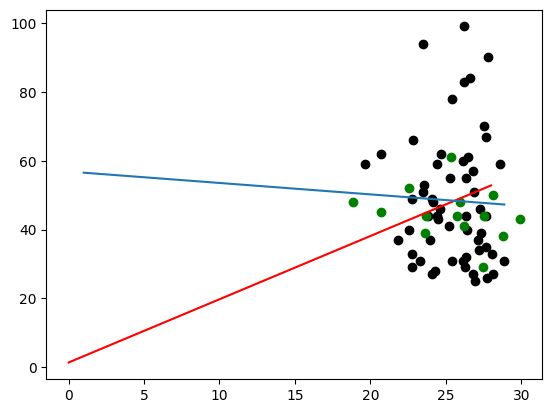

1.836723870774041 1.390346408756861
21.68986289850874


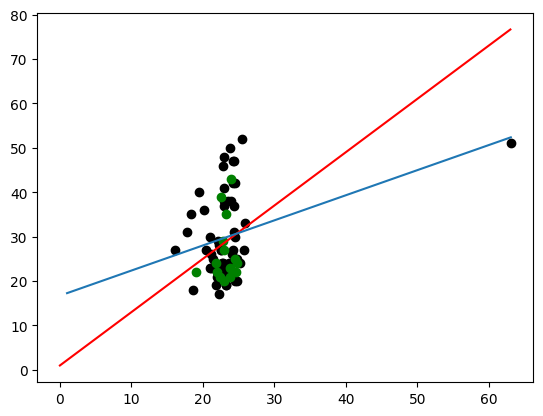

1.201132695972491 0.9788848630696177
24.33249900072223


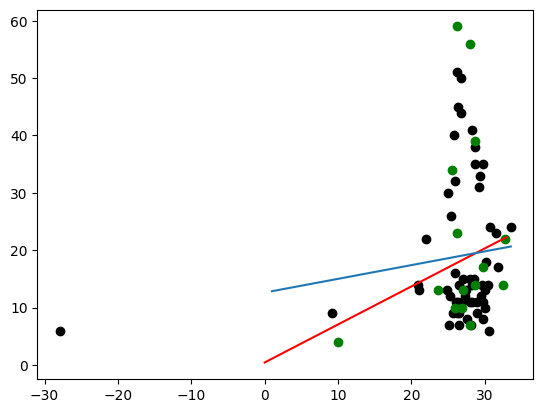

0.6627468320353734 0.4290366661530386
56.2845292848069


In [701]:

def Mape(vaild):
    global w0, w1
    print(w0, w1)
    mape = 0
    N = len(vaild)
    for i in range(N):
        mape += (abs(vaild[i, 1] - (w0*vaild[i, 0]+w1)))*100/(vaild[i, 1]*N)
    return mape

    
for i in range(1, 4):
    training_data, vaildation_data = SplitData(PreprocessData(i), i)
    w0, w1 = Regression(training_data)
    plt.scatter(training_data[:, 0], training_data[:, 1], color ='black')
    plt.scatter(vaildation_data[:, 0], vaildation_data[:, 1], color ='green')
    x = np.arange(max(training_data[:, 0]))
    y = w0*x + w1
    plt.plot(x, y, color ='red') # 繪製x,y軸的圖
    mymodel = np.poly1d(np.polyfit(training_data[:, 0], training_data[:, 1], 1))
    myline = np.linspace(1, max(training_data[:, 0]))
    plt.plot(myline, mymodel(myline))
    plt.show()
    mape = Mape(vaildation_data)
    print(mape)
    













## Write the Output File
Write the prediction to output csv
> Format: 'epiweek', 'CityA', 'CityB', 'CityC'

In [ ]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

# 2. Advanced Part (35%)
In the second part, you need to implement the regression in a different way than the basic part to help your predictions for the number of dengue cases

We provide you with two files **hw1_advanced_input1.csv** and **hw1_advanced_input2.csv** that can help you in this part

Please save the prediction result in a csv file **hw1_advanced.csv** 


# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered 
*   Summarize your work and your reflections 
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)